# ANN(MLP) 기반  예측

# ✅ 🚀 ANN(MLP) 기반 테슬라 주가 예측 코드:

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.1813 - val_loss: 0.0301
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0860 - val_loss: 0.0121
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0618 - val_loss: 0.0047
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0474 - val_loss: 0.0072
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0348 - val_loss: 0.0162
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0273 - val_loss: 0.0222
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0242 - val_loss: 0.0390
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0222 - val_loss: 0.0366
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - val_loss: 0.0295
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - val_loss: 0.0349
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - val_loss: 0.0350
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0

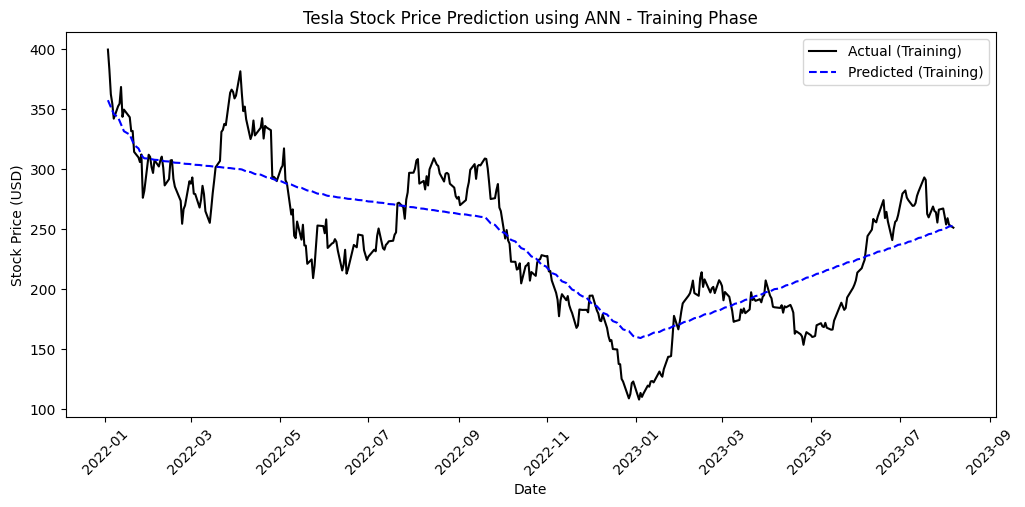

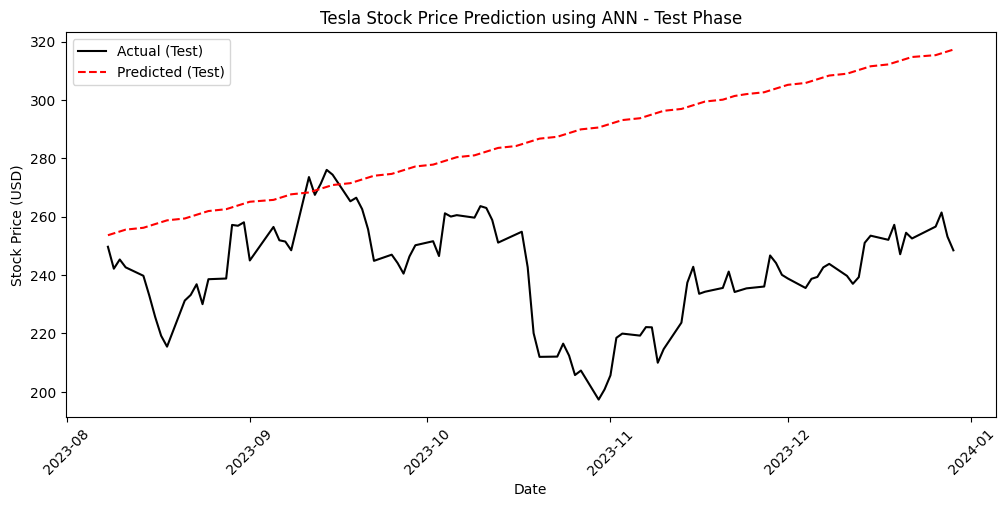

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 입력 변수(X) 및 출력 변수(y) 정의
X = df[["Day"]].values  # 날짜를 입력 변수로 사용
y = df["Close"].values  # 종가(Close)를 예측할 목표 변수로 사용

# 데이터 정규화 (MinMaxScaler 사용)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 📌 4️⃣ 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# 📌 5️⃣ ANN(MLP) 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 첫 번째 은닉층
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dense(1)  # 출력층 (주가 예측)
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 6️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# 📌 8️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 🚀 Sliding Window 적용된 ANN(MLP) 기반 테슬라 주가 예측 코드:

[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0179 - val_loss: 0.0027
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - val_loss: 9.2173e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - val_loss: 8.2161e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 8.3187e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 7.9776e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 9.6286e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 9.1647e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013 - val_loss: 7.7130e-04
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 

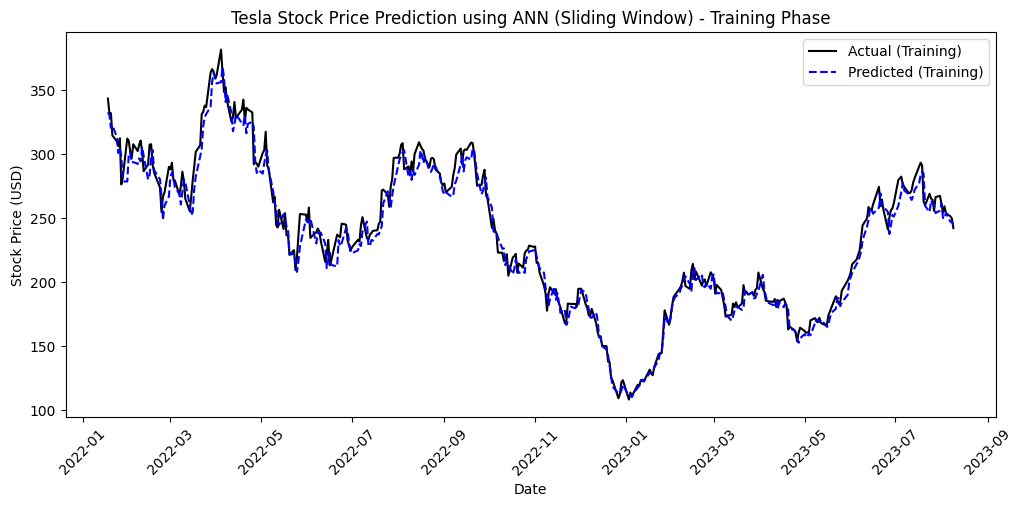

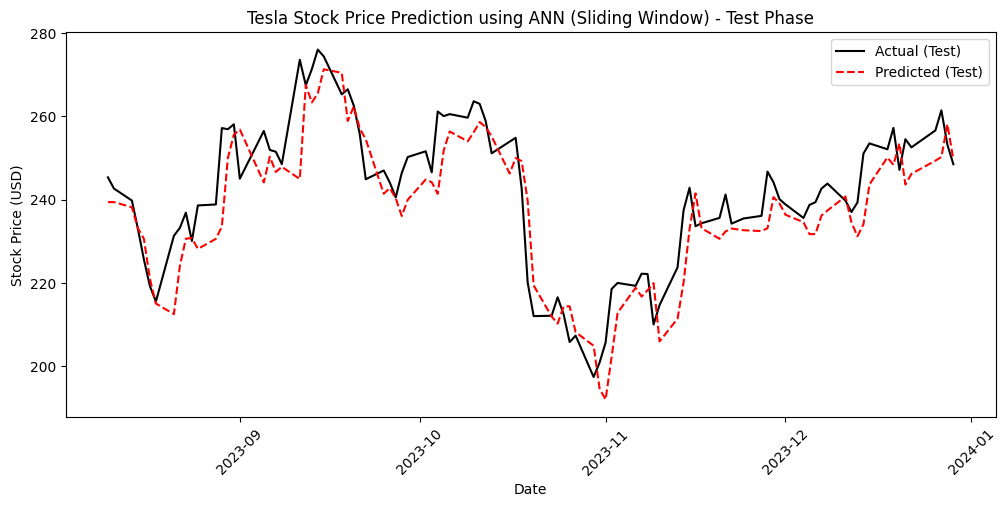

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 입력 변수(X) 및 출력 변수(y) 생성 (슬라이딩 윈도우)
window_size = 10  # 과거 10일치 데이터를 입력으로 사용

def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # window_size 만큼의 과거 데이터
        y.append(data[i + window_size])  # 다음날 주가 (타겟)
    return np.array(X), np.array(y)

# `Close`(종가) 데이터를 정규화
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# Sliding Window 적용
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 3️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 📌 4️⃣ ANN(MLP) 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),  # 첫 번째 은닉층
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dense(1)  # 출력층 (주가 예측)
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 5️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 6️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 7️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 8️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 9️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 🚀 하이퍼파라미터 튜닝이 적용된 ANN 기반 테슬라 주가 예측 코드

✔ KerasTuner를 활용하여 최적의 모델 자동 탐색
✔ 튜닝할 하이퍼파라미터 목록

은닉층(hidden layers) 개수
각 은닉층의 뉴런 수
학습률(learning rate)
✔ 최적의 하이퍼파라미터를 찾아 훈련 진행

In [ ]:
!pip install keras-tuner --upgrade

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Reloading Tuner from hyperparameter_tuning/Tesla_ANN_Tuning/tuner0.json
📌 최적의 하이퍼파라미터: {'units_1': 96, 'num_hidden_layers': 3, 'units_2': 128, 'learning_rate': 0.0005, 'units_3': 64, 'units_4': 128}
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0542 - val_loss: 0.0061
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0064 - val_loss: 0.0017
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0017 - val_loss: 9.3670e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018 - val_loss: 9.5791e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0015 - val_loss: 9.9815e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017 - val_loss: 9.2178e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024 - val_loss: 8.8429e-04
Epoch 1

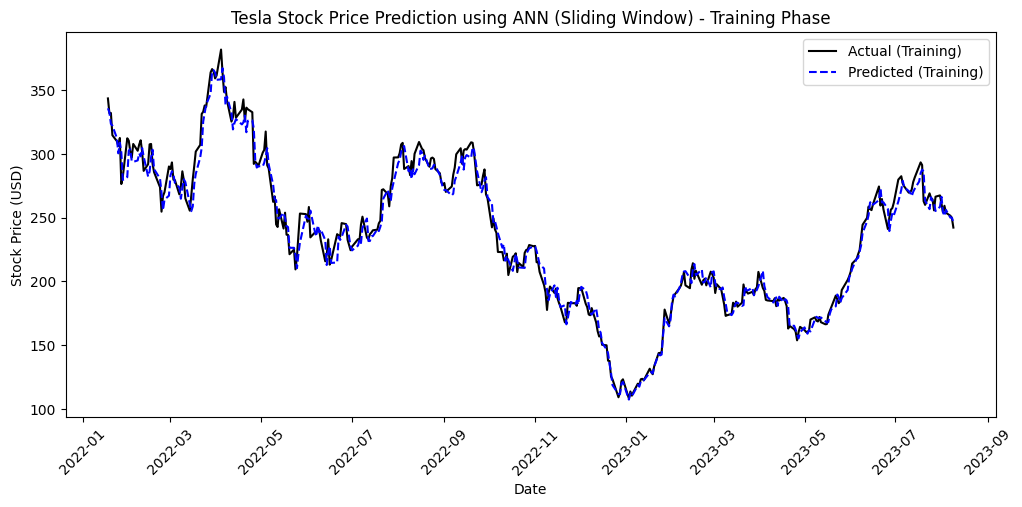

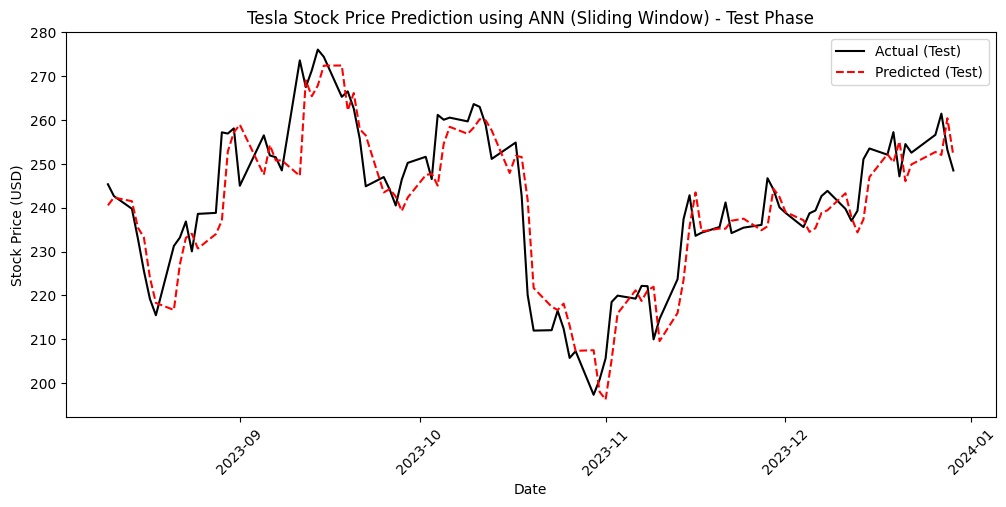

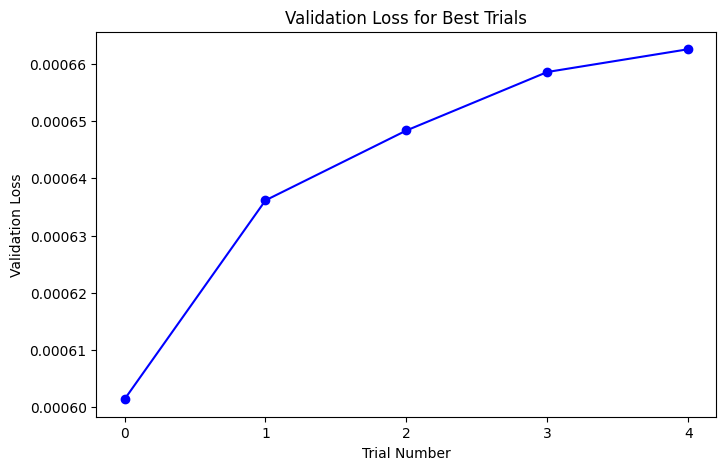

In [ ]:

import os
import shutil
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt  # KerasTuner 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 📌 기존 하이퍼파라미터 튜닝 파일 강제 삭제 (새로운 탐색을 위해)
tuner_dir = "hyperparameter_tuning/Tesla_ANN_Tuning"
shutil.rmtree(tuner_dir, ignore_errors=True)


# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 입력 변수(X) 및 출력 변수(y) 생성 (슬라이딩 윈도우)
window_size = 10  # 과거 10일치 데이터를 입력으로 사용

def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # window_size 만큼의 과거 데이터
        y.append(data[i + window_size])  # 다음날 주가 (타겟)
    return np.array(X), np.array(y)

# `Close`(종가) 데이터를 정규화
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# Sliding Window 적용
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 3️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 📌 4️⃣ 하이퍼파라미터 튜닝을 위한 모델 정의
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(window_size,)))

    # 은닉층 개수 추가 (1~3개 범위에서 최적값 탐색)
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i+2}', min_value=32, max_value=256, step=32), activation='relu'))

    model.add(Dense(1))  # 출력층

    # 학습률 최적화
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mse'
    )

    return model

# 📌 5️⃣ KerasTuner를 사용한 하이퍼파라미터 튜닝
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # 시도할 모델 개수
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='Tesla_ANN_Tuning'
)

# 📌 6️⃣ 최적의 하이퍼파라미터 찾기
tuner.search(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 최적 모델 선택
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"📌 최적의 하이퍼파라미터: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)

# 📌 8️⃣ 최적 모델 학습
history = best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 9️⃣ 예측 수행
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 🔟 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 1️⃣1️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣2️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣3️⃣ 최적 하이퍼파라미터 시각화
best_trials = tuner.oracle.get_best_trials(num_trials=5)
trial_numbers = range(len(best_trials))
val_losses = [trial.metrics.get_best_value('val_loss') for trial in best_trials]

plt.figure(figsize=(8, 5))
plt.plot(trial_numbers, val_losses, marker='o', linestyle='-', color="blue")
plt.xlabel("Trial Number")
plt.ylabel("Validation Loss")
plt.title("Validation Loss for Best Trials")
plt.xticks(trial_numbers)
plt.show()
